In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
font_dir = ['C:/python/fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths = font_dir):
    mpl.font_manager.fontManager.addfont(font)

In [3]:
# Set font family globally
mpl.rcParams['font.family'] = 'maruburi'
print(mpl.rcParams['font.family'])

['maruburi']


In [4]:
mpl.rc('axes', unicode_minus = False)

In [5]:
%matplotlib inline

# 정리

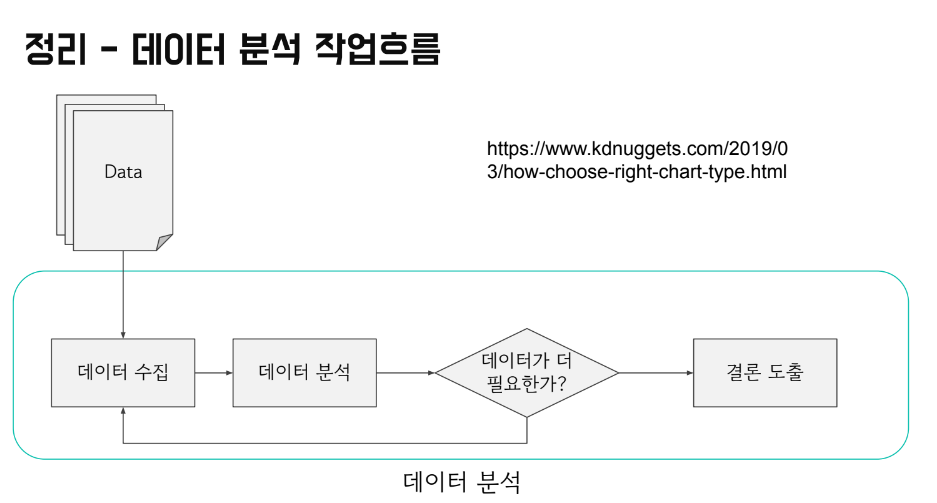

In [6]:
from IPython.display import Image

# 이미지 호출
Image("C:/python/datas/데이터 분석 작업흐름.png")

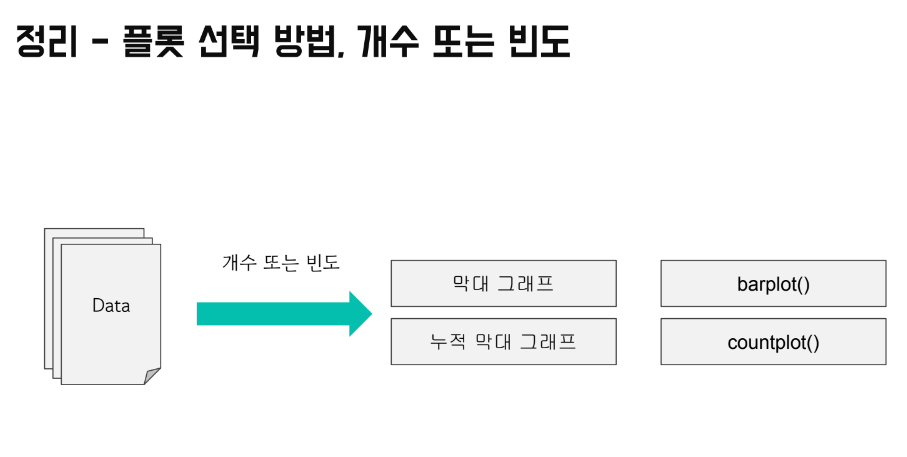

In [7]:
Image("C:/python/datas/플롯 선택 방법. 개수 또는 빈도.png")

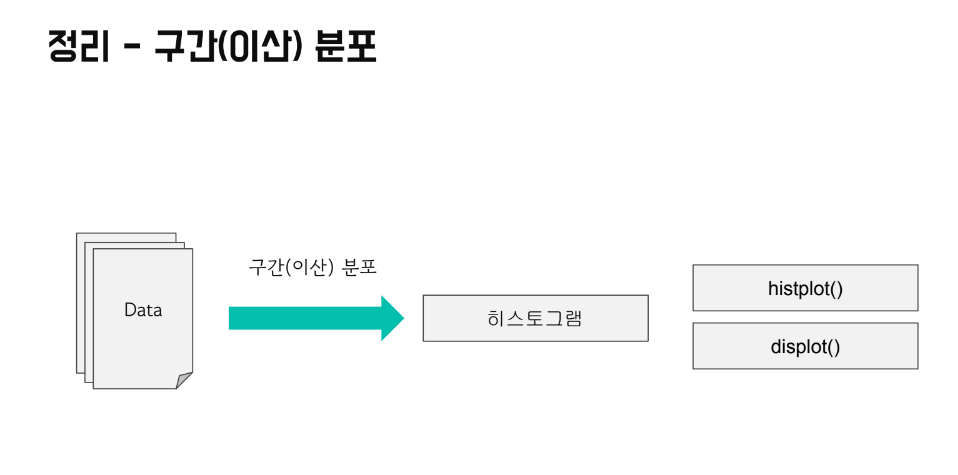

In [8]:
Image("C:/python/datas/구간(이산) 분포.png")

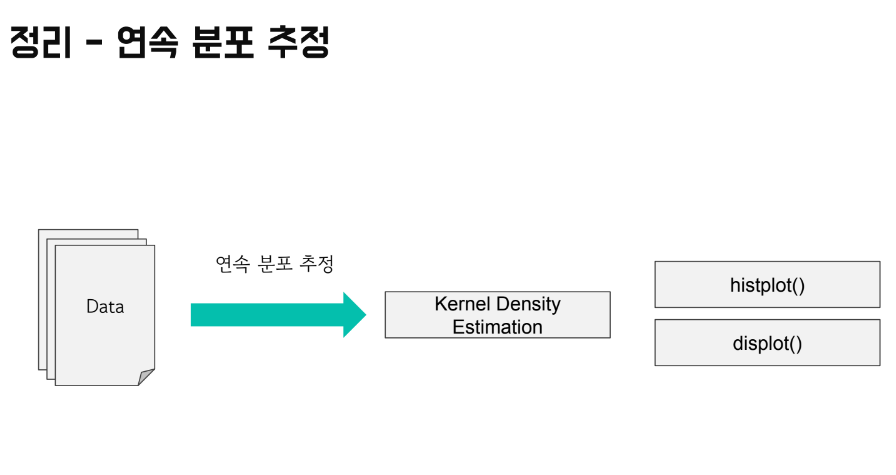

In [9]:
Image("C:/python/datas/연속 분포 추정.png")

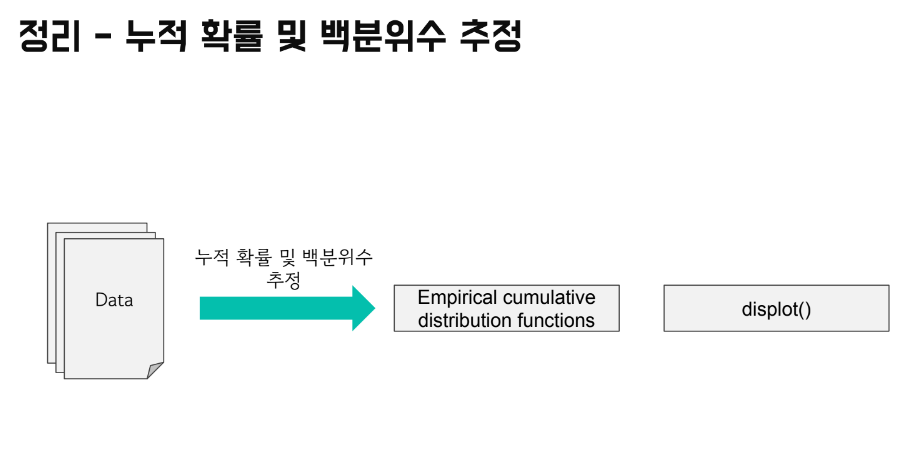

In [10]:
Image("C:/python/datas/누적 확률 및 백분위수 추정.png")

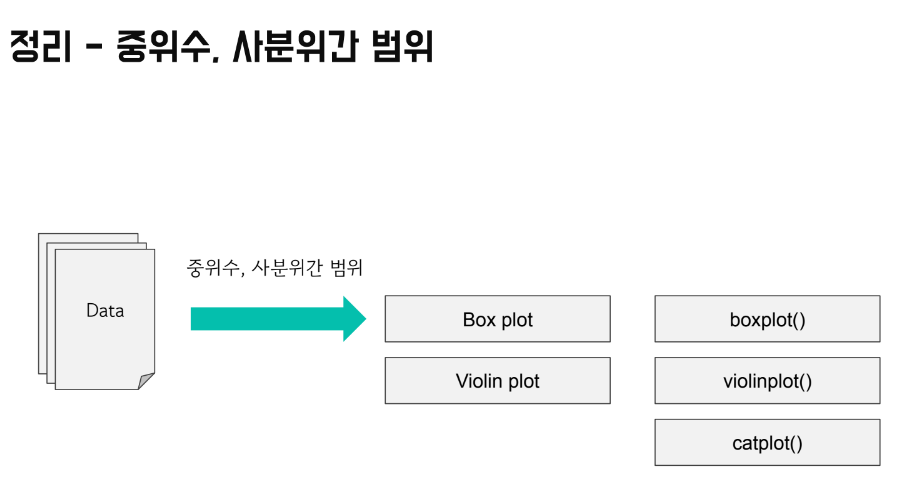

In [11]:
Image("C:/python/datas/중위수. 사분위간 범위.png")

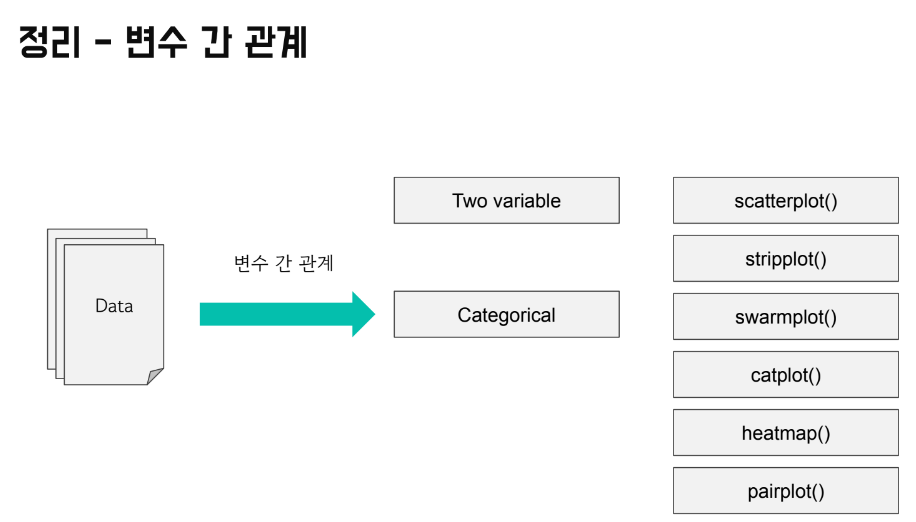

In [12]:
Image("C:/python/datas/변수 간 관계.png")

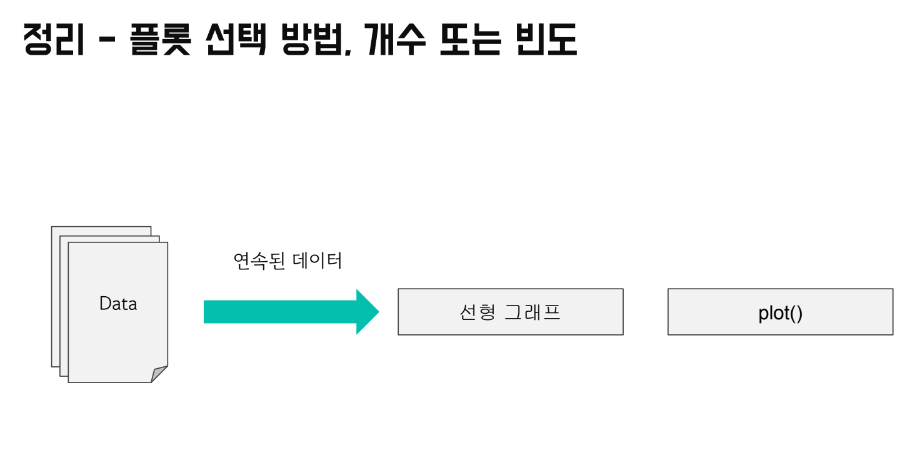

In [13]:
Image("C:/python/datas/플롯 선택 방법. 개수 또는 빈도2.png")

# seaborn 실습 (Stack Overflow Annual Developer Survey)

In [14]:
survey_raw_df = pd.read_csv("C:/python/datas/survey_results_public.csv", index_col = ["ResponseId"])
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [15]:
schema_raw = pd.read_csv("C:/python/datas/survey_results_schema.csv", index_col = ["qname"])["question"]
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [16]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [17]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [18]:
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [19]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [20]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [21]:
# 생략되는 column이 없도록 설정 변경

# - display.max_columns: 표현되는 column의 최대 개수
# - display.max_rows: 표현되는 row의 최대 개수

# 표현되는 column과 row의 범위를 변경
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)

In [22]:
# 매우 많은 column이 존재하는데, 이 중 일부를 발췌하여 사용

# - 인구 통계(성별, 나이, 학력 등)
# - 프로그래밍 기술, 경험 및 선호도
# - 고용 관련 정보, 선호도 및 의견

selected_columns = [
    # 인구 통계
    'Country', 'Age', 'Gender', 'EdLevel',
    # 프로그래밍 경험
    'YearsCode', 'YearsCodePro', 'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith', 'LearnCodeCoursesCert',
    'ProfessionalTech', 'SOAccount',
    # 고용 관련 정보
    'Employment', 'DevType', 'WorkExp'
]

In [23]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [24]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

# YearsCode

In [25]:
print(schema_raw["YearsCode"])

Including any education, how many years have you been coding in total?


In [26]:
survey_df["YearsCode"].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

## 문제1

In [27]:
# 작업에 들어가기 이전에 해당 column(Series)이 NaN 값을 얼마나 갖는지 확인하기 위한
# 함수를 생성

# - series를 인자로 갖는 count_nan 함수를 만든다.
# - 이 함수는 인자로 전달된 series의 NaN 개수를 반환해준다.

def count_nan(series):
    return len(series) - series.count()

In [28]:
count_nan(survey_df.YearsCode)

1937

## 문제2

In [29]:
# YearsCode의 'Less than 1 year'의 값은 0으로 변경하고 'More than 50 years'의 값은
# 51로 일괄적으로 변경하려 한다.

# 또 dtype을 float로 변경하고 이를 survey_df[“YearsCode”]에 적용해보자.
# - 아래의 Series의 메서드를 활용
# - 힌트: replace(변경 전 값, 변경 후 값, inplace=True)

# Series.replace(to_reploace = None, value = _NoDefault.no_defualt, *,
#                inplace = False, limit = None, regex = False, 
#                method = _NoDefault.no_default)

# 1년 이하는 0으로 변경
survey_df.YearsCode.replace("Less than 1 year", 0, inplace = True)
# 50년 이상은 51으로 변경
survey_df.YearsCode.replace("More than 50 years", 51, inplace = True)
# dtype을 float으로 변경
survey_df.YearsCode = survey_df.YearsCode.astype(float)

# YearsCodePro

In [30]:
# 이번엔 YearsCode와 비슷한 YearsCodePro에 대해 살펴보자.

# 이 column은 교육 기간을 포함하지 않는다는 차이점만 찾는 것을 확인할 수 있다. 
# 즉, 순수하게 일한 기간만을 나타내는 설문 항목이다.

# YearsCode보다 결측치가 많아 보인다.

print(schema_raw.YearsCodePro)

NOT including education, how many years have you coded professionally (as a part of your work)?


In [31]:
count_nan(survey_df.YearsCodePro)
# YearsCode는 결측치는 1937개

21435

In [32]:
survey_df.YearsCodePro.value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

## 문제3 

In [33]:
survey_df.YearsCodePro.replace(['Less than 1 year', 'More than 50 years'], 
                               [0, 51], inplace = True)

survey_df.YearsCodePro = survey_df.YearsCodePro.astype('f')

# survey_df.describe()

In [34]:
# survey_df.describe()를 통해 값의 분포를 확인 
# 범위마다 표현되는 값이 실수이다 보니 데이터 값이 
# 실수 값을 갖는 것을 짐작해볼 수 있다.

# YearsCode, YearsCodePro, WorkExp가 현재 수치형 데이터이므로
# 3개 컬럼에 대해서 describe 적용

survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712011,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [35]:
# 만약 YearsCode, YearsCodePro에 대한 값 중 "Less than 1 year", "More than 50 years"
# 의 값을 NaN으로 처리하면서 수치 자료형으로 바꾼다면 아래 보이는 것처럼
# to_numeric() 메서드를 사용할 수도 있다.

# pandas.to_numeric(arg, errors = 'raise', downcast = None)

# errors : {'ignore', 'raise', 'coerce'}, default 'raise'
# If 'raise', then invalid parsing will raise an exception.
# If 'coerce', then invalid parsing will be set as NaN.
# If 'ignore', then invalid parsing will return the input.

survey_df2 = survey_raw_df[selected_columns].copy()

survey_df2.YearsCode = pd.to_numeric(survey_df2.YearsCode, errors='coerce')
survey_df2.YearsCodePro = pd.to_numeric(survey_df2.YearsCodePro, errors='coerce')

survey_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               69746 non-null  float64
 5   YearsCodePro            49820 non-null  float64
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(3), object(11)
memory usage

# Gender 

In [36]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [37]:
survey_df.Gender.value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [38]:
# contains() 메서드

# np.nan 값이 섞인 Series 자료형에 대해 특정 문자 값이 포함되었는지 사용할 수 있는
# 메서드로 contains()가 있다. 
# 첫 인자로 포함된 것을 찾을 문자열을 넣어준다. 
# na 키워드 인수를 활용하면 NaN 값을 대신할 값을 넣을 수 있다.

# where() 메서드

# 첫 인자로 bool Series를 받을 수 있고 그 Series의 각 row의 값이 False인 경우에 두번째
# 인수로 넘겨준 값으로 변경을 한다.
# 즉 False일 때만 값을 변경하는데, 변경하는 값은 두번째 인수의 값으로 변경한다.


# 앞의 두 메서드를 활용하면 ‘;’를 포함하는 row를 NaN 값으로 변경할 수 있다. 
# 그 활용은 아래의 예제와 같다.

# ‘~’은 비트 연산자로 Series 자료형의 벡터화 연산을 위해 True를 False로 False는 True로
# 반전해주는 역할을 한다.

# Gender 내에서 ;가 포함되면 True, NaN값은 Fasle로 반환
# ~를 통해서 ;가 False, 그 외는 True

In [39]:
survey_df.Gender.str.contains(';') # ;가 포함되면 True
# 없으면 False, NaN값은 그대로

ResponseId
1          NaN
2          NaN
3        False
4        False
5          NaN
         ...  
73264    False
73265    False
73266    False
73267    False
73268    False
Name: Gender, Length: 73268, dtype: object

In [40]:
survey_df.Gender.str.contains(';', na = False)
# NaN 값도 False로 변경

ResponseId
1        False
2        False
3        False
4        False
5        False
         ...  
73264    False
73265    False
73266    False
73267    False
73268    False
Name: Gender, Length: 73268, dtype: bool

In [41]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)),
                np.nan, inplace = True)
# ~를 통해 ;가 포함된 것을 False, 그 외는 True
# where는 False일 경우 두번째 인수에 있는 값을 적용
# 따라서 ;포함되었다면 NaN이 된다.

In [42]:
survey_df.Gender.value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

# 데이터 시각화

In [43]:
# 시각화 환경 설정

# 그리드 스타일 설정
sns.set_style('darkgrid')

# 기본 폰트의 크기 설정
mpl.rcParams['font.size'] = 14

# 기본 figure 사이즈 설정
mpl.rcParams['figure.figsize'] = (9, 5)

# 기본 figure 내 배경 색상을 흰색(#fffff)으로 설정
mpl.rcParams['figure.facecolor'] = '#ffffff'

# Axes의 배경 색상을 지정(문자열로 흰색을 지정)
mpl.rcParams['axes.facecolor']  = 'white'

In [44]:
# matplotlib의 스타일을 지정할 수도 있다.
# - plt.style.available: 사용 가능한 스타일을 모두 보여준다.
# - plt.style.use(“원하는스타일”): 스타일을 적용, “default” 값을 인수로 쓰면
#   스타일을 적용하기 전 원래의 스타일로 적용

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [45]:
# plt.style.use('default')

In [46]:
# plt.style.use('Solarize_Light2')

In [47]:
# stack overflow의 커뮤니티 특성상 갖게되는 데이터의 편향적 특징에 대해 살펴보자.

# 우선 응답자가 거주하는 국가가 무엇인지 분포를 파악하자.

schema_raw.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [48]:
survey_df.Country.unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [49]:
# Country에 대한 유일한 값의 개수 확인
# NaN값은 count에 포함하지 않는다.

survey_df.Country.nunique()

180

## 문제4

In [50]:
# 설문 응답자가 속한 국가 중 응답자 수 상위 15개 국가를 구현

top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

# Country

## 문제5

In [51]:
# 그리드 스타일 설정
sns.set_style('darkgrid')

In [52]:
# Set font family globally
mpl.rcParams['font.family'] = 'maruburi'
print(mpl.rcParams['font.family'])

['maruburi']


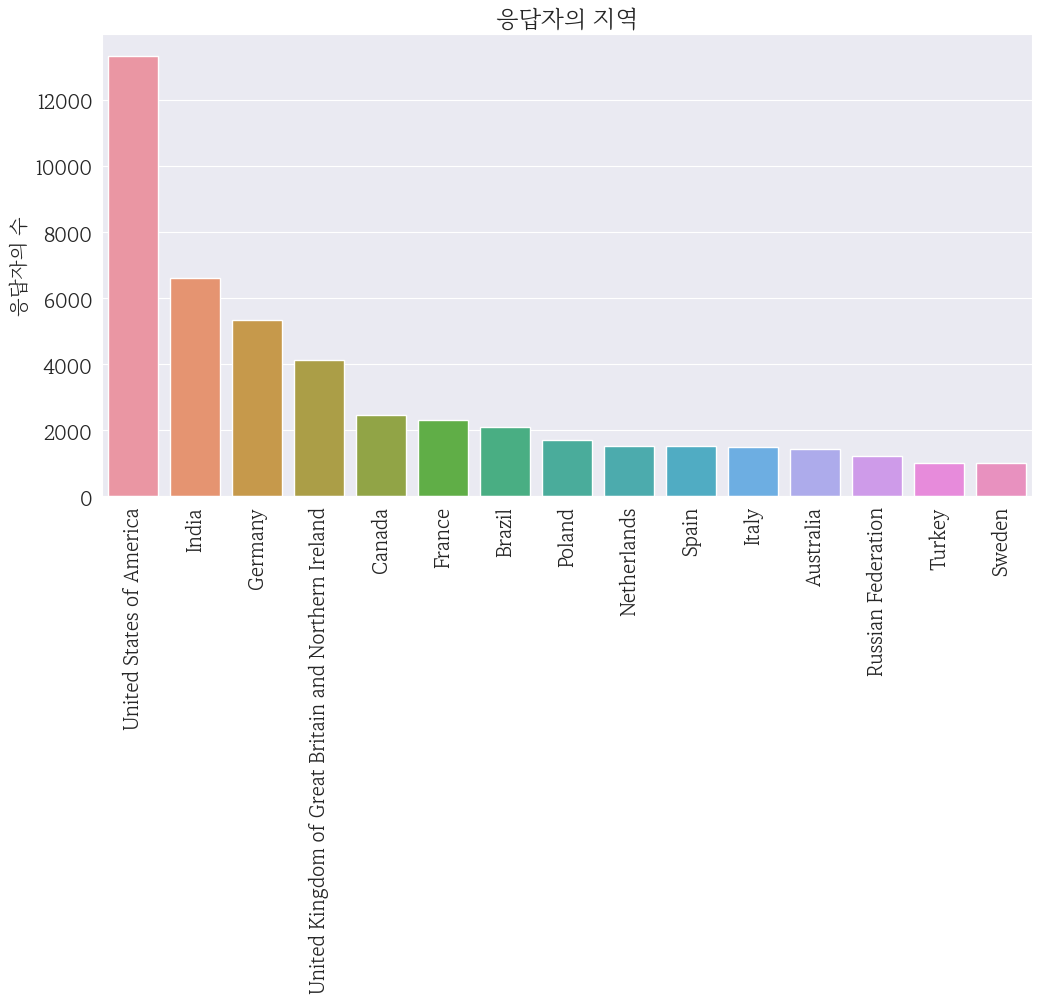

In [53]:
# 앞의 연습 문제에서 구한 값을 가지고 차트 작성

# - xticks의 글자를 회전시키려면 rotation 키워드 인수에 
# 각도를 의미하는 정수 값을 입력하면 된다.
plt.figure(figsize=(12, 6))

sns.barplot(x = top_countries.index, y = top_countries)

plt.title("응답자의 지역")
plt.xticks(rotation = 90)
plt.ylabel("응답자의 수")
plt.show()

In [54]:
# Stack Overflow Annual Developer Survey가 영어로 진행되고, 또 이들 국가의 영어 사용
# 인구가 가장 많기 때문에 응답자의 비율이 미국과 인도에서 불균형적으로 높은 것으로
# 보인다.

# 즉 이 설문 조사는 특히 비영어권 국가의 글로벌 프로그래밍 커뮤니티를 대표하지 않을 수
# 있음을 이미 알 수 있다. 
# 비영어권 국가의 프로그래머 응답자 수가 거의 확실하게 부족하다.

# Age

In [55]:
# 응답자의 연령 분포는 살펴야할 데이터의 중요한 요소이다.

# 이 설문에서 조사하는 연령에 대한 데이터의 특징이 어떤지 우선 살펴보자.

schema_raw.Age

'What is your age?'

In [56]:
count_nan(survey_df.Age)
# Age data 내부에 NaN값이 3,011개가 있다.

3011

In [57]:
age_counts = survey_df.Age.value_counts()
age_counts
# Age의 데이터의 분포를 보면 숫자가 아닌 범주형의 데이터이다.

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [58]:
survey_df.Age.unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [59]:
survey_df.Age.nunique()
# 범주의 개수는 8개

8

## 문제6

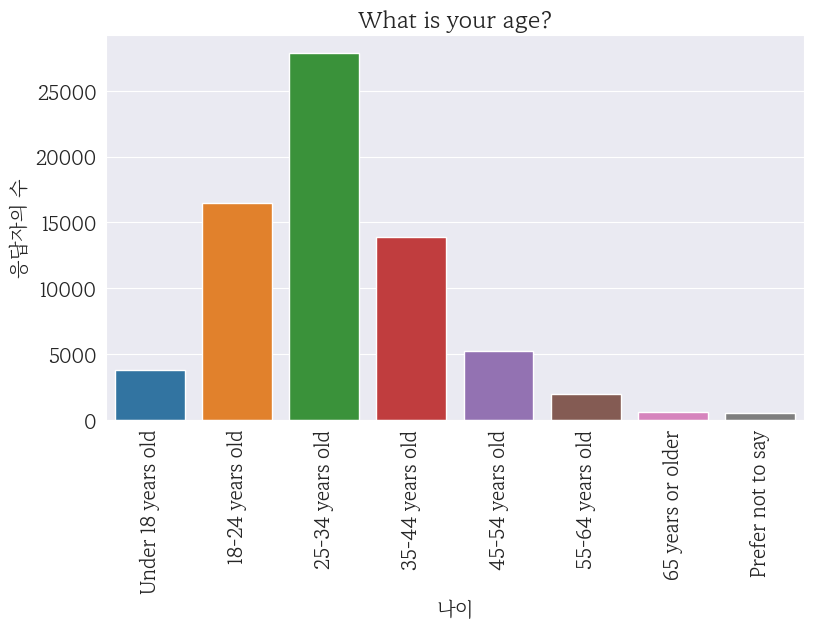

In [60]:
order = ["Under 18 years old", "18-24 years old",
         "25-34 years old", "35-44 years old",
         "45-54 years old", "55-64 years old",
         "65 years or older", "Prefer not to say"]
sns.barplot(x = age_counts.index, y = age_counts, order = order)

plt.title(schema_raw.Age)
plt.xticks(rotation = 90)
plt.xlabel("나이")
plt.ylabel("응답자의 수")
plt.show()

# 성별에 대한 응답 분포

In [61]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [62]:
gender_counts = survey_df.Gender.value_counts(normalize = True)
gender_counts

Man                                                  0.920839
Woman                                                0.048446
Prefer not to say                                    0.016704
Non-binary, genderqueer, or gender non-conforming    0.010034
Or, in your own words:                               0.003977
Name: Gender, dtype: float64

## 문제7

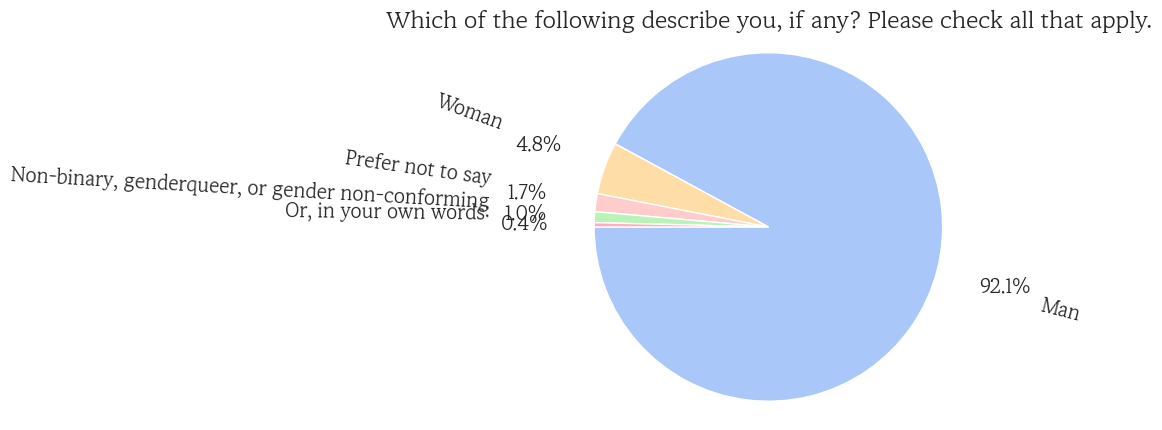

In [63]:
labels = gender_counts.index
sizes = gender_counts
colors = ['#A9C8F9', '#FFDDA6', '#FFCCCC', '#B8F3B8', '#FFADC5']
# explode = (0, 0, 0, 0) # 카테고리간 이격도

plt.title(schema_raw.Gender)
plt.pie(sizes, labels = labels, colors = colors,
        autopct = '%1.1f%%', startangle = 180, rotatelabels = True,
       pctdistance = 1.4, labeldistance = 1.6)
# 소수점 첫째 자리까지 표기, %%를 통해 끝네 % 표시
# rotatelabels : 라벨들을 회전
# pctdistance : pct 라벨들의 위치를 옮김(숫자가 커질수록 밖으로 이동)
# labeldistance : 라벨들의 위치를 옮김(숫자가 커질수록 밖으로 이동)
plt.axis('equal') # 원의 형태를 유지
plt.show()

In [64]:
# 응답자 중 약 8%만 남성이 아닌 여성 혹은 논바이너리라고 밝혔다.

# 이 Stack overflow 커뮤니티의 대다수의 응답이 남성으로부터 나온 것이라는 것을 확인할
# 수 있다.

# EdLevel

In [65]:
# 응답자의 교육 수준에 대한 설문도 존재하기에 그에 대한 내용을 확인보자.
schema_raw.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [66]:
Edlevel_count = survey_df.EdLevel.value_counts()
Edlevel_count

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

## 문제8

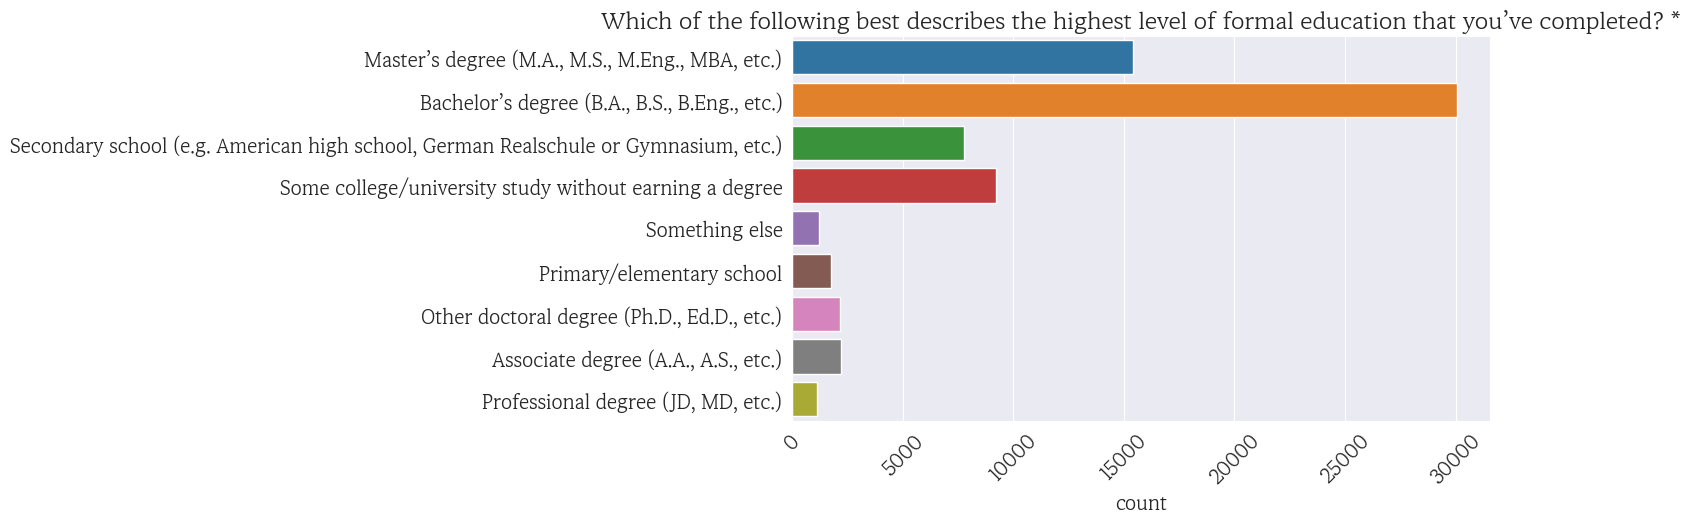

In [67]:
order2 = [
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
    "Some college/university study without earning a degree",
    "Something else",
    "Primary/elementary school",
    "Other doctoral degree (Ph.D., Ed.D., etc.)",
    "Associate degree (A.A., A.S., etc.)",
    "Professional degree (JD, MD, etc.)"
]

sns.barplot(x = Edlevel_count, y = Edlevel_count.index, order = order2)
plt.title(schema_raw.EdLevel)
plt.xticks(rotation = 45)
plt.xlabel('count')
plt.show()

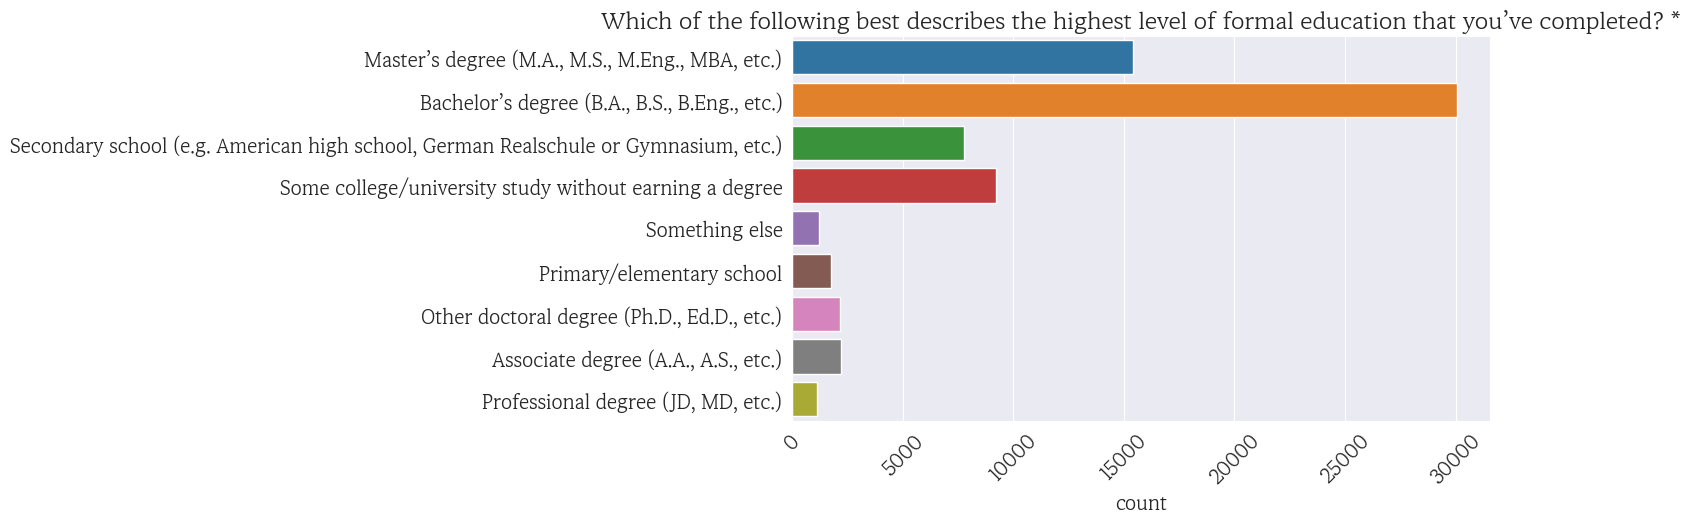

In [68]:
sns.countplot(y = survey_df.EdLevel)
plt.xticks(rotation = 45)
plt.title(schema_raw.EdLevel)
plt.ylabel(None)
plt.show()

## 문제9

In [69]:
# 응답자의 상당수가 학사 학위 혹은 석사 학위 소지자임을 확인할 수 있다.

# stack overflow를 사용하는 사람은 어느 정도 대학 교육을 받은 것으로 보인다.

# 위 그래프로는 비율을 파악하기는 쉽지 않아 보인다. 
# x축이 비율을 나타내도록 변경

# - y축 순서 고려하세요.
# - x축의 단위가 퍼센트로 변경됐습니다.

EdLevel_count2 = survey_df.EdLevel.value_counts(True) * 100
EdLevel_count2

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          42.396196
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       21.718704
Some college/university study without earning a degree                                12.971402
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.960933
Associate degree (A.A., A.S., etc.)                                                    3.133509
Other doctoral degree (Ph.D., Ed.D., etc.)                                             3.036160
Primary/elementary school                                                              2.492981
Something else                                                                         1.724065
Professional degree (JD, MD, etc.)                                                     1.566049
Name: EdLevel, dtype: float64

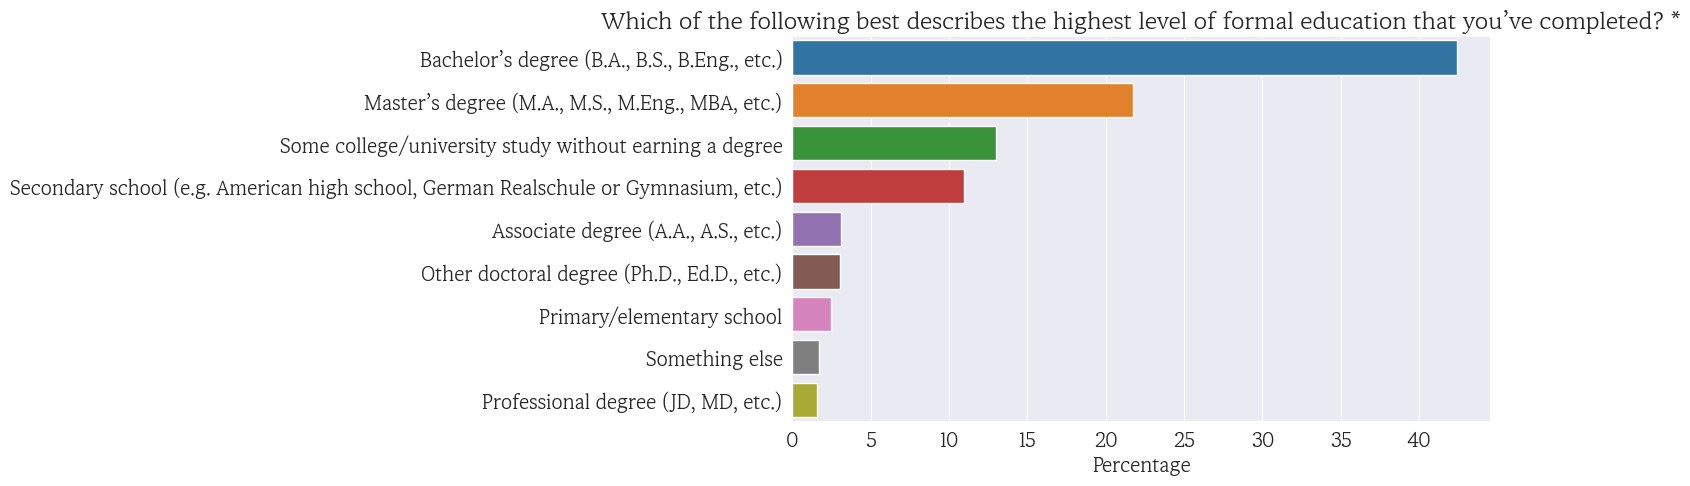

In [70]:
sns.barplot(x = EdLevel_count2, y = EdLevel_count2.index)
plt.title(schema_raw.EdLevel)
plt.xlabel('Percentage')
plt.show()

In [71]:
# 응답자의 40% 이상이 학사 학위를 소지하고 있는 것을 쉽게 확인할 수 있다.

# 또 약 22%가 석사 학위를 소지하고 있는 것을 확인할 수 있다.

# stack overflow의 설문 응답자 중 약 66%는 어느 정도의 
# 대학 교육을 받은 것으로 확인할 수 있다.

# Employment

In [72]:
# 프리랜서, 계약직은 프로그래머 사이에서 흔히 볼 수 있는 고용 형태이다.

# Stack overflow의 연간 개발자 설문에서 이에 대한 항목이 존재한다.

# 풀타임, 파트타임, 프리랜서 등을 나타내는 column은 Employment이다.

schema_raw.Employment

'Which of the following best describes your current employment status?'

In [73]:
# Employment의 데이터 분포를 확인해보면 다양한 고용 형태가 존재하는 
# 것을 확인할 수 있다.

# 그 중 대부분을 차지하는 것이 고용 형태의 풀타임 근무인 것으로 보인다.
# 전체 중 비율을 얼마나 차지하는지 그래프를 통해 데이터를 확인해보자.

survey_df.Employment.value_counts()

Employed, full-time                                                                                               42644
Student, full-time                                                                                                 6663
Independent contractor, freelancer, or self-employed                                                               4941
Employed, full-time;Independent contractor, freelancer, or self-employed                                           3456
Not employed, but looking for work                                                                                 1810
                                                                                                                  ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                       1
Employed, full-time;Student, full-time;Student, part-time;Independent contractor, freelancer, or self-employed        1
Employed, part-time;Not employed, and no

## 문제10

In [74]:
top_employments = (survey_df.Employment.value_counts(True)*100).head(15)
top_employments

Employed, full-time                                                         60.045058
Student, full-time                                                           9.381864
Independent contractor, freelancer, or self-employed                         6.957195
Employed, full-time;Independent contractor, freelancer, or self-employed     4.866235
Not employed, but looking for work                                           2.548578
Student, full-time;Employed, part-time                                       1.616446
Employed, part-time                                                          1.571388
Student, part-time                                                           1.458744
Employed, full-time;Student, full-time                                       1.353140
Employed, full-time;Student, part-time                                       1.312306
Student, part-time;Employed, part-time                                       1.009575
Student, full-time;Not employed, but looking for work 

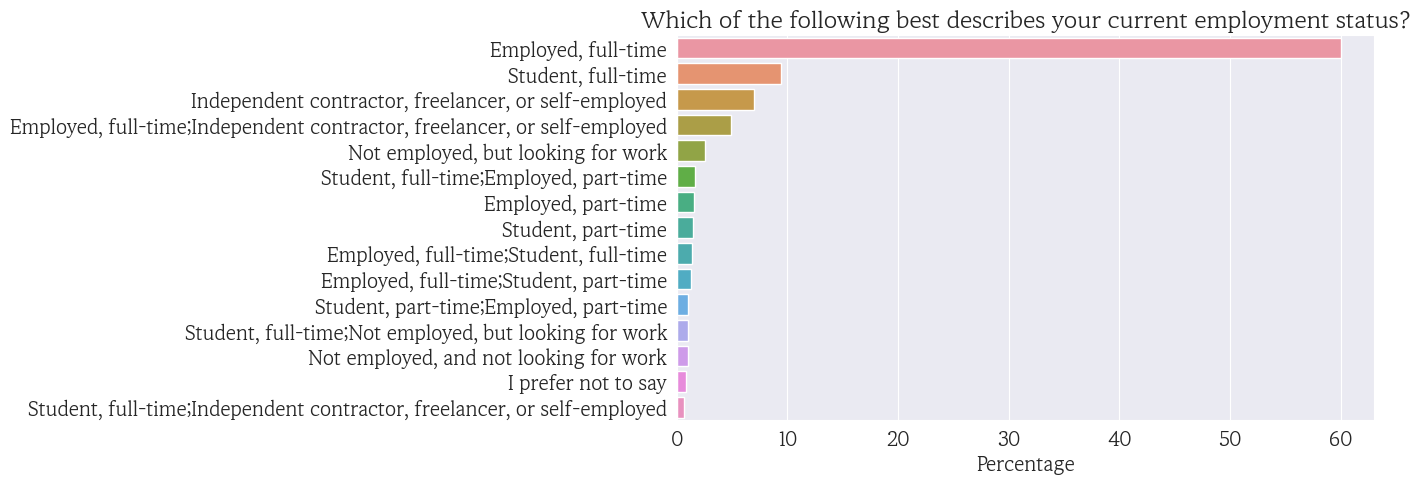

In [75]:
sns.barplot(x = top_employments, y = top_employments.index)
plt.title(schema_raw.Employment)
plt.xlabel("Percentage")
plt.show()

In [76]:
# Employment의 데이터 분포를 확인해본 결과 풀타임 고용 형태가 제일 많은 것으로
# 집계된 것을 확인할 수 있다.

# 이 Employment에 대한 설문은 복수의 답을 할 수 있어서 독특한 분포를 보이는데, 
# 약 70%인 풀타임 근무를 제외하면 약 30%가 다양한 고용 형태로 일하고 있음을 
# 확인할 수 있다.

# DevType 

In [77]:
# 응답자가 맡은 역할에 대한 DevType에 대해 살펴보도록 하자.

# 이 항목도 복수 응답이 가능하기에 통계 분석을 하기에 조금 까다로울 수 있다.

schema_raw.DevType

'Which of the following describes your current job? Please select all that apply.'

In [78]:
survey_df.DevType.count()

60761

In [79]:
# 약 10,000개의 가지수가 있는 것으로 조회된다.
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7091
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5274
Developer, front-end                                                                                                                            

## 문제11

In [80]:
def split_multicolumn(col_series):
    # 반환할 DataFrame
    result_df = col_series.to_frame()
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    
    # NaN 값을 갖는 row를 제외하고 반봅
    for idx, value in col_series[col_series.notnull()].items():
        
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            
            # 파싱한 기술 스택에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True와 같은 결과
    
    return result_df[options]

In [81]:
# def split_multicolumn(s):
#     s.dropna(inplace=True)
#     df = pd.DataFrame(s)
#     for x in s.str.split(';').items():
#         for y in x[1]:
#             df.loc[x[0],y]=True
#     df.fillna(False,inplace=True)
#     return df
    
# split_multicolumn(survey_df.DevType)

In [82]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [83]:
survey_df.DevType.loc[73268]

'Developer, front-end;Engineer, data;Engineer, site reliability;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test;Student;Developer, mobile;Academic researcher;DevOps specialist;Developer, embedded applications or devices;Developer, game or graphics;Cloud infrastructure engineer;Data or business analyst;Designer;Scientist;Product manager;System administrator'

## 문제12

In [84]:
# 각 역할별로 개수를 갖는 Series를 만들어 보세요.

dev_type_totals = dev_type_df.sum().sort_values(ascending = False)
dev_type_totals

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

## 문제13

In [85]:
# 각 역할별로 퍼센트를 갖는 Series를 만들어 보세요.
# - 전체 합이 100이 되어야한다.
# - devtype_percentage로 명명한다.

devtype_percentage = dev_type_totals / dev_type_totals.sum() * 100
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

## 문제14

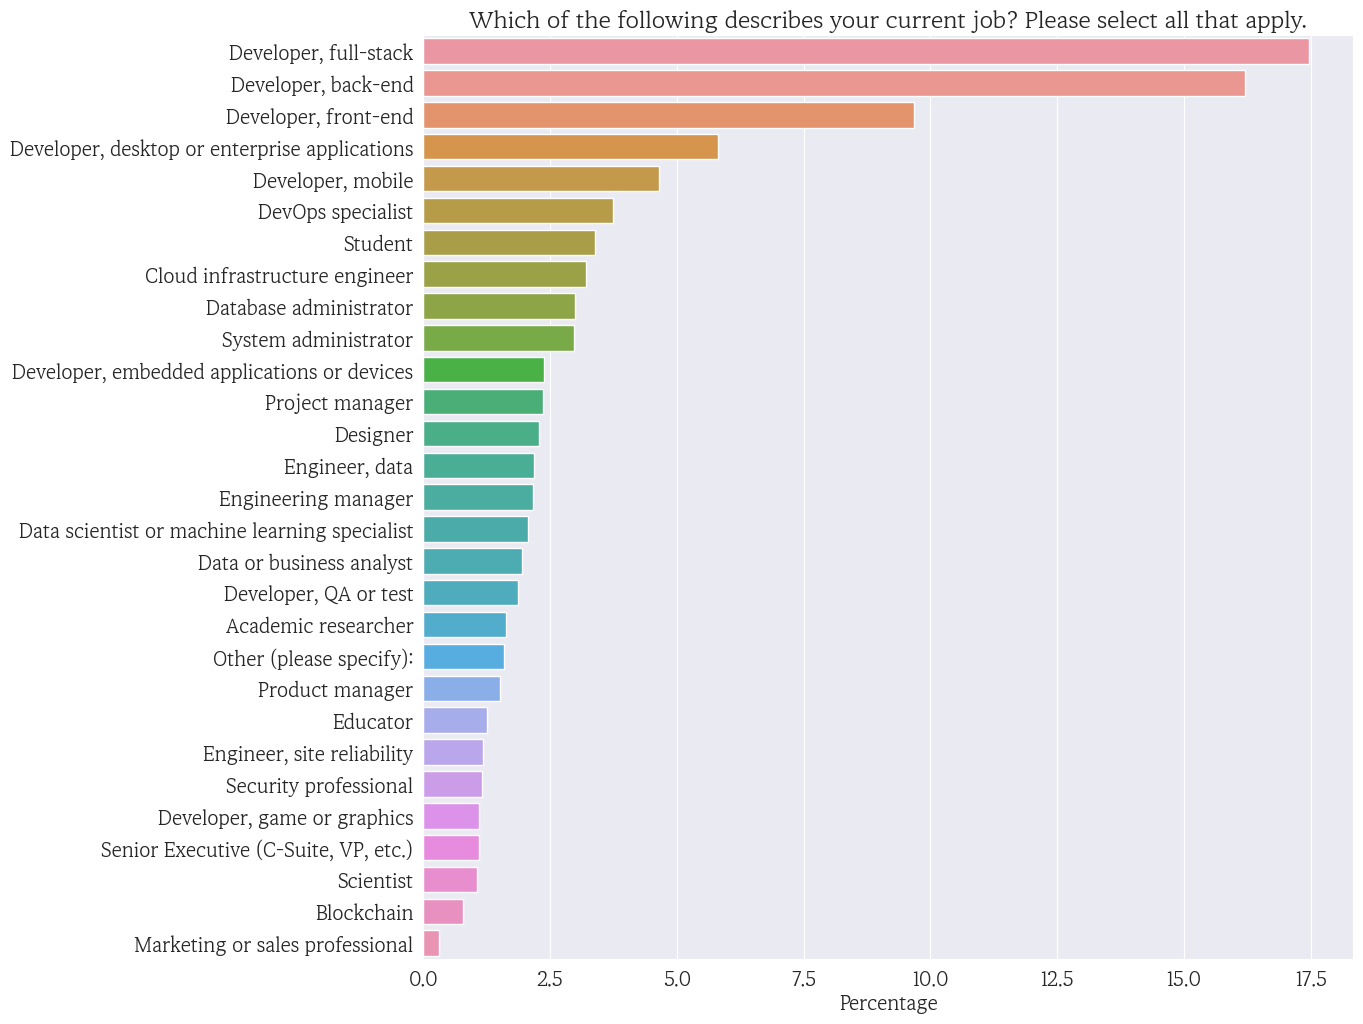

In [86]:
# 각 역학별로 퍼센트를 갖는 그래프를 그려보자.
# - figsize: 12 x 12
# - x label: Percentage
# - y label: None

plt.figure(figsize=(12, 12))

sns.barplot(x = devtype_percentage, y = devtype_percentage.index)
plt.ylabel(None)
plt.xlabel("Percentage")
plt.title(schema_raw.DevType)
plt.show()

In [87]:
# 일반적으로 예상할 수 있듯이 가장 많이 차지하는 역할 이름에 "개발자"가 포함된다.

# 데이터 관련 역할이 차지하는 비중을 각자 확인해보자.

## 문제15

In [88]:
# 2022년 가장 인기 있는 프로그래밍 언어는 무엇인가?
# - LanguageHaveWorkedWith 열을 이용해서 그래프로 그려보자.
# - 내림차순으로 정렬
# - figure size는 12 x 12
# - x축은 퍼센트, y축은 기술 스텍별 카테고리

survey_df.LanguageHaveWorkedWith

ResponseId
1                                                      NaN
2                                    JavaScript;TypeScript
3                        C#;C++;HTML/CSS;JavaScript;Python
4                             C#;JavaScript;SQL;TypeScript
5              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73264    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73265            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73266                   HTML/CSS;JavaScript;PHP;Python;SQL
73267                                        C#;Delphi;VBA
73268          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [89]:
language_worked_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
language_worked_df

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,Lua,PHP,C,Java,Delphi,Bash/Shell,PowerShell,Rust,Elixir,Erlang,Ruby,R,Scala,VBA,Dart,Go,Kotlin,Groovy,MATLAB,Perl,Haskell,Julia,LISP,Assembly,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,True,True,False,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,True,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
language_worked_totals = language_worked_df.sum().sort_values(ascending=False)
language_worked_totals

JavaScript     45969
HTML/CSS       38714
SQL            34782
Python         33772
TypeScript     24470
Java           23395
Bash/Shell     20357
C#             19672
C++            15839
PHP            14660
C              13506
PowerShell      8469
Go              7823
Rust            6483
Kotlin          6416
Dart            4592
Ruby            4226
Assembly        3796
Swift           3444
R               3261
VBA             3147
MATLAB          2869
Lua             2802
Groovy          2322
Delphi          2287
Scala           1799
Objective-C     1668
Perl            1611
Haskell         1531
Elixir          1497
Julia           1059
Clojure         1042
Solidity        1008
LISP             899
F#               713
Fortran          631
Erlang           619
APL              475
COBOL            445
SAS              417
OCaml            402
Crystal          324
dtype: int64

In [91]:
language_worked_percentage = language_worked_totals / language_worked_totals.sum() * 100
language_worked_percentage

JavaScript     12.656210
HTML/CSS       10.658759
SQL             9.576199
Python          9.298125
TypeScript      6.737094
Java            6.441124
Bash/Shell      5.604700
C#              5.416106
C++             4.360802
PHP             4.036199
C               3.718479
PowerShell      2.331690
Go              2.153833
Rust            1.784903
Kotlin          1.766457
Dart            1.264272
Ruby            1.163505
Assembly        1.045117
Swift           0.948204
R               0.897820
VBA             0.866434
MATLAB          0.789895
Lua             0.771448
Groovy          0.639294
Delphi          0.629658
Scala           0.495302
Objective-C     0.459235
Perl            0.443541
Haskell         0.421516
Elixir          0.412155
Julia           0.291564
Clojure         0.286884
Solidity        0.277523
LISP            0.247513
F#              0.196304
Fortran         0.173727
Erlang          0.170423
APL             0.130777
COBOL           0.122518
SAS             0.114809


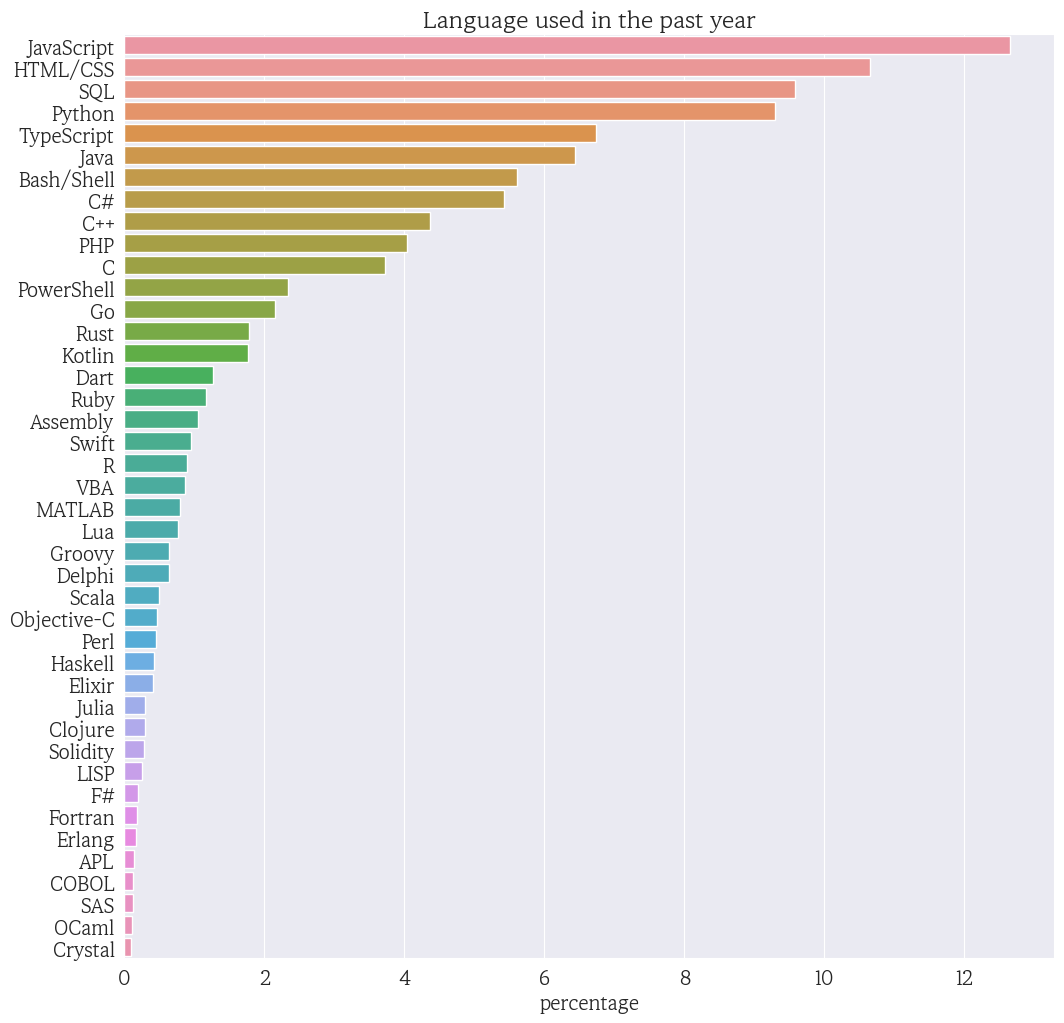

In [92]:
plt.figure(figsize=(12, 12))
sns.barplot(x = language_worked_percentage, y = language_worked_percentage.index)
plt.title("Language used in the past year")
plt.xlabel("percentage")
plt.show()

In [93]:
# 웹 개발이 오늘날 가장 많이 요구되는 기술 중 하나이기 때문에 Javascript 및
# HTML/CSS가 가장 많이 사용하는 기술 스텍으로 조회된다.

# SQL은 관계형 데이터베이스로 작업하는 데 필요하므로 대부분의 프로그래머가
# 정기적으로 SQL문 작성을 한다.

# Python은 20년 이상 서버 및 애플리케이션 개발의 업계 표준이었던 Java를 제치고
# 상위권으로 올라왔다.

# TypeScript는 5위를 차지했으며 해를 거듭할 수록 인기를 얻고 있다.

## 문제16

In [94]:
# 사는 곳이 한국인 응답자의 기술 스텍의 분포를 구해보자.

# - South Korea인 사람의 분포만 다시 그리면 된다.

home_country = survey_df[survey_df.Country == "South Korea"]
home_country

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1289,South Korea,25-34 years old,Prefer not to say,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,NaN,Rust,Rust,NaN,NaN,No,"Student, full-time",NaN,NaN
2991,South Korea,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11.0,5.0,C++;HTML/CSS;JavaScript;Python,C++;JavaScript;Rust;TypeScript,NaN,Continuous integration (CI) and (more often) c...,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",5.0
3024,South Korea,25-34 years old,Man,Some college/university study without earning ...,8.0,5.0,Bash/Shell;Go;JavaScript;OCaml;SQL;TypeScript,Bash/Shell;Crystal;Elixir;Erlang;F#;Go;JavaScr...,NaN,DevOps function;Microservices;Continuous integ...,Yes,"Employed, full-time","Developer, full-stack",6.0
3161,South Korea,18-24 years old,Man,"Associate degree (A.A., A.S., etc.)",6.0,NaN,C#;Go;JavaScript;Rust;TypeScript,C#;Rust,NaN,NaN,Yes,"Student, part-time",NaN,NaN
3351,South Korea,18-24 years old,Man,Some college/university study without earning ...,6.0,0.0,HTML/CSS;Java;JavaScript;Kotlin;SQL;TypeScript,Kotlin;Rust;TypeScript,Other,None of these,Yes,"Employed, full-time","Developer, back-end;Student",6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70938,South Korea,18-24 years old,Man,"Secondary school (e.g. American high school, G...",8.0,6.0,Bash/Shell;C++;Groovy;HTML/CSS;Java;JavaScript...,Bash/Shell;HTML/CSS;Java;JavaScript;Kotlin;Rus...,NaN,DevOps function;Microservices,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Edu...",6.0
70985,South Korea,45-54 years old,Woman,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25.0,21.0,C;C++;HTML/CSS;Java;JavaScript;Python;SQL,HTML/CSS;Java;JavaScript;Python;SQL;TypeScript,Coursera;Udemy;Codecademy,Innersource initiative;DevOps function;Microse...,Yes,"Employed, full-time;Employed, part-time",Data scientist or machine learning specialist;...,25.0
71427,South Korea,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,0.0,NaN,NaN,Coursera;Udemy,NaN,Yes,"Employed, full-time","Developer, back-end",NaN


In [95]:
# 사는 곳을 나타내는 컬럼인 Country의 값이 South Korea인 응답을 인덱싱을 통해
# 필터링 하자.

# “Republic of Korea”와 “South Korea” 둘 다 고려하려면 아래와 같이 작성하면 된다.

# home_country = survey_df[(survey_df.Country == 'South Korea') | 
#                         (survey_df.Country == "Republic of Korea")]
# home_country

In [96]:
home_language_worked_df = split_multicolumn(home_country.LanguageHaveWorkedWith)
home_language_worked_df

,Rust,C++,HTML/CSS,JavaScript,Python,Bash/Shell,Go,OCaml,SQL,TypeScript,C#,Java,Kotlin,R,SAS,C,Scala,Assembly,Swift,Objective-C,PHP,Ruby,Dart,Haskell,PowerShell,APL,COBOL,LISP,Lua,Clojure,MATLAB,Elixir,Julia,VBA,Solidity,Crystal,Delphi,Erlang,F#,Fortran,Groovy,Perl
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1289,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2991,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3024,False,False,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3161,True,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3351,False,False,True,True,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70938,True,True,True,True,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
70985,False,True,True,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
71427,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [97]:
# 한국인의 기술 스텍에 대한 개수를 집계

home_language_worked_totals = home_language_worked_df.sum().sort_values(ascending = False)
home_language_worked_totals

JavaScript     144
Python         116
HTML/CSS       106
Java            98
SQL             84
TypeScript      80
C++             69
Bash/Shell      58
C               53
C#              47
Kotlin          39
Go              25
PHP             22
Swift           18
Rust            18
PowerShell      15
Dart            14
R               10
MATLAB          10
Objective-C     10
Assembly         9
Ruby             8
VBA              6
Groovy           5
Delphi           5
Haskell          5
Elixir           5
Scala            4
OCaml            4
Julia            4
Lua              4
Clojure          3
LISP             3
Solidity         3
F#               3
SAS              3
COBOL            2
APL              2
Erlang           2
Perl             2
Crystal          1
Fortran          1
dtype: int64

In [98]:
home_languages_worked_percentages = home_language_worked_totals / home_language_worked_totals.sum() * 100
home_languages_worked_percentages

JavaScript     12.857143
Python         10.357143
HTML/CSS        9.464286
Java            8.750000
SQL             7.500000
TypeScript      7.142857
C++             6.160714
Bash/Shell      5.178571
C               4.732143
C#              4.196429
Kotlin          3.482143
Go              2.232143
PHP             1.964286
Swift           1.607143
Rust            1.607143
PowerShell      1.339286
Dart            1.250000
R               0.892857
MATLAB          0.892857
Objective-C     0.892857
Assembly        0.803571
Ruby            0.714286
VBA             0.535714
Groovy          0.446429
Delphi          0.446429
Haskell         0.446429
Elixir          0.446429
Scala           0.357143
OCaml           0.357143
Julia           0.357143
Lua             0.357143
Clojure         0.267857
LISP            0.267857
Solidity        0.267857
F#              0.267857
SAS             0.267857
COBOL           0.178571
APL             0.178571
Erlang          0.178571
Perl            0.178571


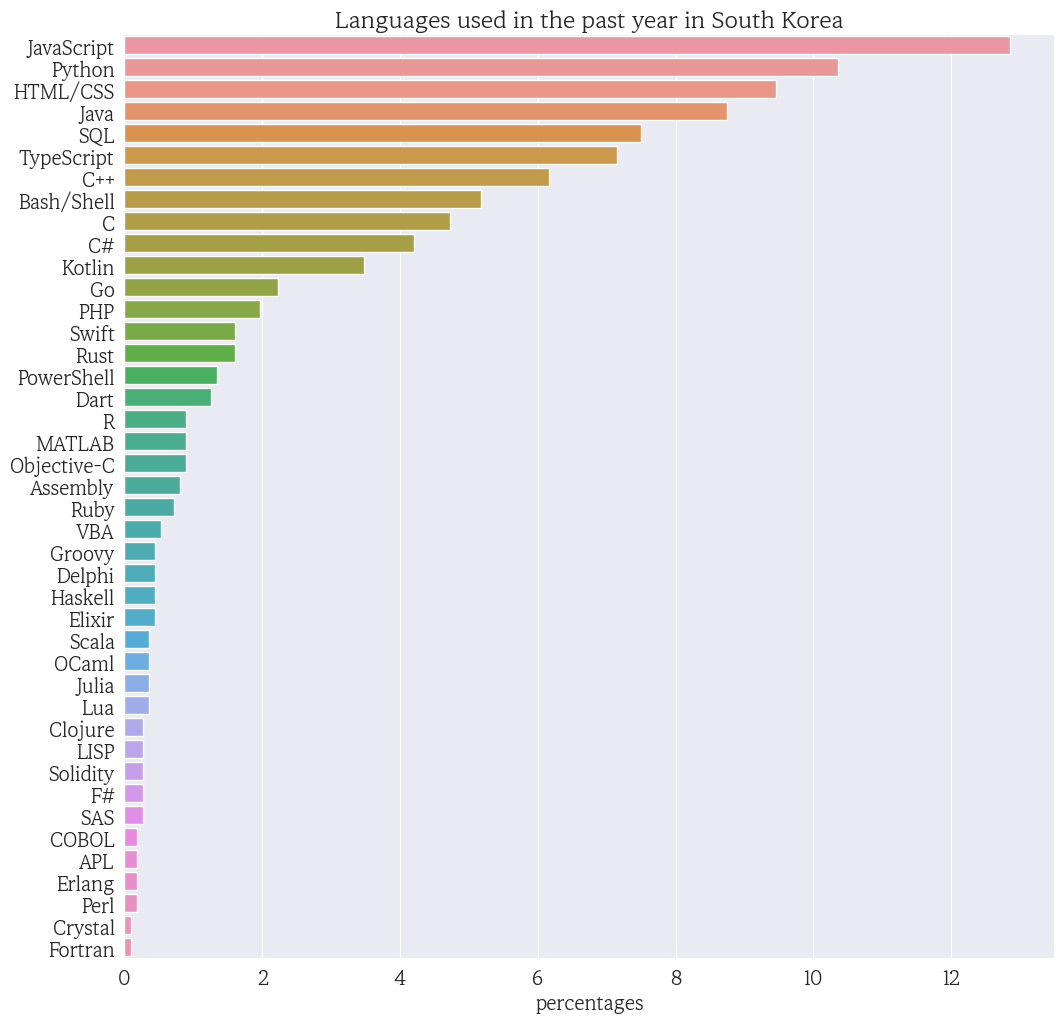

In [99]:
# value_counts()로 얻은 값이 내림차순이기 때문에 그대로 활용하면
# 내림차순의 그래프를 얻을 수 있다.

plt.figure(figsize=(12, 12))
sns.barplot(x = home_languages_worked_percentages, y = home_languages_worked_percentages.index)
plt.title("Languages used in the past year in South Korea")
plt.xlabel("percentages")
plt.show()

## 문제17

In [100]:
# 데이터 사이언스 관련 분야에서 일하는 응답자들이 가장 많이 사용하는 언어는
# 무엇인지 구해보자.

# - DevType이 'Data scientist or machine learning specialist'인
# 대상자를 상대로 구하면 된다.

survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [101]:
data_science_folks = survey_df[survey_df.DevType == 
                               "Data scientist or machine learning specialist"]
data_science_folks

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
464,Israel,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13.0,9.0,Bash/Shell;Python;SQL,NaN,NaN,NaN,No,"Employed, full-time",Data scientist or machine learning specialist,NaN
1090,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,4.0,Python,Go;Rust,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist,NaN
1705,United States of America,35-44 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",24.0,11.0,Elixir;Python;Rust;SQL;TypeScript,Elixir;Julia;Python;Rust;SQL,NaN,DevOps function;Continuous integration (CI) an...,Yes,"Employed, full-time",Data scientist or machine learning specialist,11.0
1708,United States of America,18-24 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8.0,1.0,Python,Python;Rust,NaN,Microservices;Automated testing,No,"Employed, full-time",Data scientist or machine learning specialist,1.0
1871,Netherlands,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,4.0,Bash/Shell;Go;HTML/CSS;Python,Bash/Shell;Go;Julia;Python;Rust,Coursera,DevOps function,Yes,"Employed, full-time",Data scientist or machine learning specialist,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72707,South Africa,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,2.0,R;SQL,Python;R;SQL,NaN,None of these,No,"Employed, full-time",Data scientist or machine learning specialist,1.0
72793,Lithuania,25-34 years old,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)",6.0,2.0,Bash/Shell;Python,Go,Coursera;Udemy;Udacity,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time",Data scientist or machine learning specialist,8.0
73045,Viet Nam,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,3.0,C++;Python,C++;Go;Python,Coursera;Other,Innersource initiative,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,2.0


In [102]:
# data_science_folks = survey_df[survey_df.DevType.str.contains(
#     "Data scientist or machine learning specialist", na = False)]
# data_science_folks

# 완전히 같은 것 외에 포함하는 관계로 만드로 싶다면 위와 같이 작성할 수 있다.

In [103]:
data_science_folks.LanguageHaveWorkedWith

ResponseId
464                          Bash/Shell;Python;SQL
1090                                        Python
1705             Elixir;Python;Rust;SQL;TypeScript
1708                                        Python
1871                 Bash/Shell;Go;HTML/CSS;Python
                           ...                    
72707                                        R;SQL
72793                            Bash/Shell;Python
73045                                   C++;Python
73065                        Java;Python;Scala;SQL
73265    Bash/Shell;HTML/CSS;JavaScript;Python;SQL
Name: LanguageHaveWorkedWith, Length: 494, dtype: object

In [104]:
data_science_folks_language = split_multicolumn(data_science_folks.LanguageHaveWorkedWith)
data_science_folks_language

,Bash/Shell,Python,SQL,Elixir,Rust,TypeScript,Go,HTML/CSS,Assembly,C,C++,Java,JavaScript,Julia,R,SAS,C#,PowerShell,Scala,PHP,MATLAB,Dart,LISP,Perl,Kotlin,COBOL,Swift,Ruby,VBA,Lua,Haskell,Groovy,Objective-C,Solidity,APL,Fortran,Delphi,Clojure,OCaml,F#
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
464,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1090,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1705,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1708,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1871,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72707,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
72793,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73045,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [105]:
data_science_folks_language_totals = data_science_folks_language.sum().sort_values(ascending = False)
data_science_folks_language_totals

Python         463
SQL            270
R              141
Bash/Shell     140
JavaScript     109
HTML/CSS        93
C++             91
Java            59
C               52
Julia           32
PowerShell      31
MATLAB          31
TypeScript      28
C#              27
SAS             23
Scala           22
Go              19
Rust            19
VBA             14
Swift            8
Lua              8
Dart             8
Haskell          7
Assembly         7
PHP              7
LISP             6
Kotlin           5
Perl             5
Ruby             5
Objective-C      5
Clojure          3
Elixir           2
Groovy           2
Solidity         2
Fortran          2
Delphi           2
COBOL            1
APL              1
OCaml            1
F#               1
dtype: int64

In [106]:
data_science_folks_language_percentage = data_science_folks_language_totals / data_science_folks_language_totals.sum() * 100
data_science_folks_language_percentage

Python         26.426941
SQL            15.410959
R               8.047945
Bash/Shell      7.990868
JavaScript      6.221461
HTML/CSS        5.308219
C++             5.194064
Java            3.367580
C               2.968037
Julia           1.826484
PowerShell      1.769406
MATLAB          1.769406
TypeScript      1.598174
C#              1.541096
SAS             1.312785
Scala           1.255708
Go              1.084475
Rust            1.084475
VBA             0.799087
Swift           0.456621
Lua             0.456621
Dart            0.456621
Haskell         0.399543
Assembly        0.399543
PHP             0.399543
LISP            0.342466
Kotlin          0.285388
Perl            0.285388
Ruby            0.285388
Objective-C     0.285388
Clojure         0.171233
Elixir          0.114155
Groovy          0.114155
Solidity        0.114155
Fortran         0.114155
Delphi          0.114155
COBOL           0.057078
APL             0.057078
OCaml           0.057078
F#              0.057078


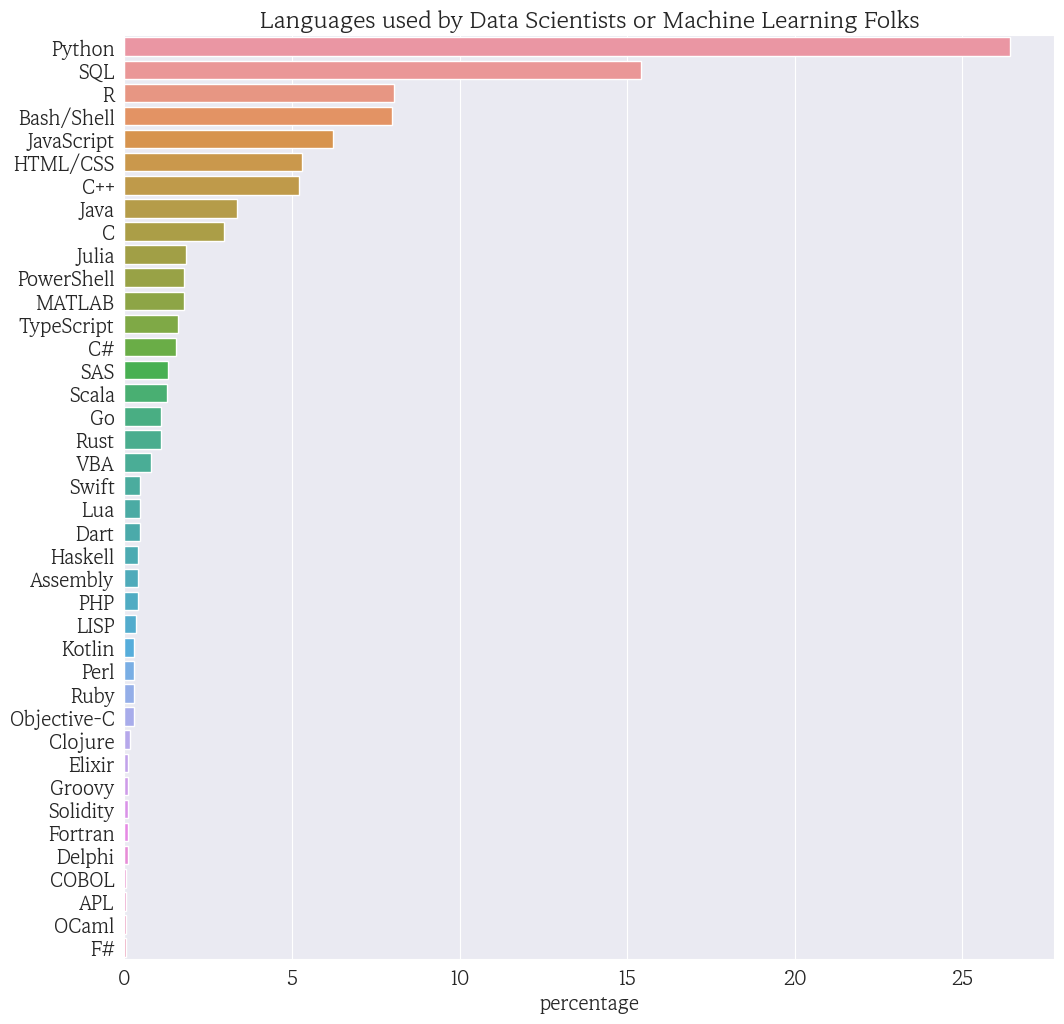

In [107]:
plt.figure(figsize=(12, 12))
sns.barplot(x = data_science_folks_language_percentage, y = data_science_folks_language_percentage.index)
plt.title("Languages used by Data Scientists or Machine Learning Folks")
plt.xlabel('percentage')
plt.show()

## 문제18

In [108]:
# 내년에 가장 많은 사람들이 배우고 싶어하는 언어는 무엇일까? 
# x축을 전체에서 차지하는 비율로 하는 그래프로 표현해보자.

survey_df.LanguageWantToWorkWith

ResponseId
1                                                   NaN
2                                       Rust;TypeScript
3                 C#;C++;HTML/CSS;JavaScript;TypeScript
4                                     C#;SQL;TypeScript
5            C#;Elixir;F#;Go;JavaScript;Rust;TypeScript
                              ...                      
73264    Bash/Shell;Go;JavaScript;Python;SQL;TypeScript
73265                        HTML/CSS;JavaScript;Python
73266             C#;HTML/CSS;JavaScript;PHP;Python;SQL
73267                                            Delphi
73268                        PowerShell;Rust;TypeScript
Name: LanguageWantToWorkWith, Length: 73268, dtype: object

In [109]:
language_interested_in_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
language_interested_in_df

,Rust,TypeScript,C#,C++,HTML/CSS,JavaScript,SQL,Elixir,F#,Go,Lua,C,Java,Kotlin,Python,Swift,APL,Bash/Shell,Delphi,Haskell,Erlang,Ruby,Scala,PowerShell,VBA,Julia,PHP,Dart,Groovy,Perl,LISP,Clojure,Assembly,Solidity,R,Crystal,Objective-C,SAS,OCaml,MATLAB,Fortran,COBOL
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,True,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,True,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,True,False,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [110]:
language_interested_in_df_totals = language_interested_in_df.sum().sort_values(ascending = False)
language_interested_in_df_totals

JavaScript     31235
Python         29043
TypeScript     25787
HTML/CSS       25130
SQL            24579
Rust           16847
C#             15514
Go             15354
Java           13208
Bash/Shell     13050
C++            11746
Kotlin          9215
C               7729
PHP             7244
Dart            6028
Swift           5010
PowerShell      4646
Ruby            3835
Elixir          3247
Assembly        2961
Haskell         2883
R               2880
Solidity        2578
Scala           2410
Lua             2337
Julia           2174
F#              1901
Clojure         1896
Delphi          1643
Erlang          1197
LISP            1189
MATLAB          1033
Groovy          1015
Perl             907
VBA              900
Objective-C      857
OCaml            710
APL              569
Crystal          488
Fortran          419
SAS              361
COBOL            327
dtype: int64

In [111]:
language_interested_in_df_percentage = language_interested_in_df_totals / language_interested_in_df_totals.sum() * 100
language_interested_in_df_percentage

JavaScript     10.339908
Python          9.614277
TypeScript      8.536424
HTML/CSS        8.318933
SQL             8.136532
Rust            5.576963
C#              5.135692
Go              5.082726
Java            4.372323
Bash/Shell      4.320019
C++             3.888348
Kotlin          3.050496
C               2.558577
PHP             2.398024
Dart            1.995485
Swift           1.658490
PowerShell      1.537993
Ruby            1.269523
Elixir          1.074874
Assembly        0.980197
Haskell         0.954377
R               0.953384
Solidity        0.853411
Scala           0.797797
Lua             0.773631
Julia           0.719672
F#              0.629299
Clojure         0.627644
Delphi          0.543892
Erlang          0.396250
LISP            0.393602
MATLAB          0.341960
Groovy          0.336001
Perl            0.300250
VBA             0.297932
Objective-C     0.283698
OCaml           0.235036
APL             0.188359
Crystal         0.161546
Fortran         0.138704


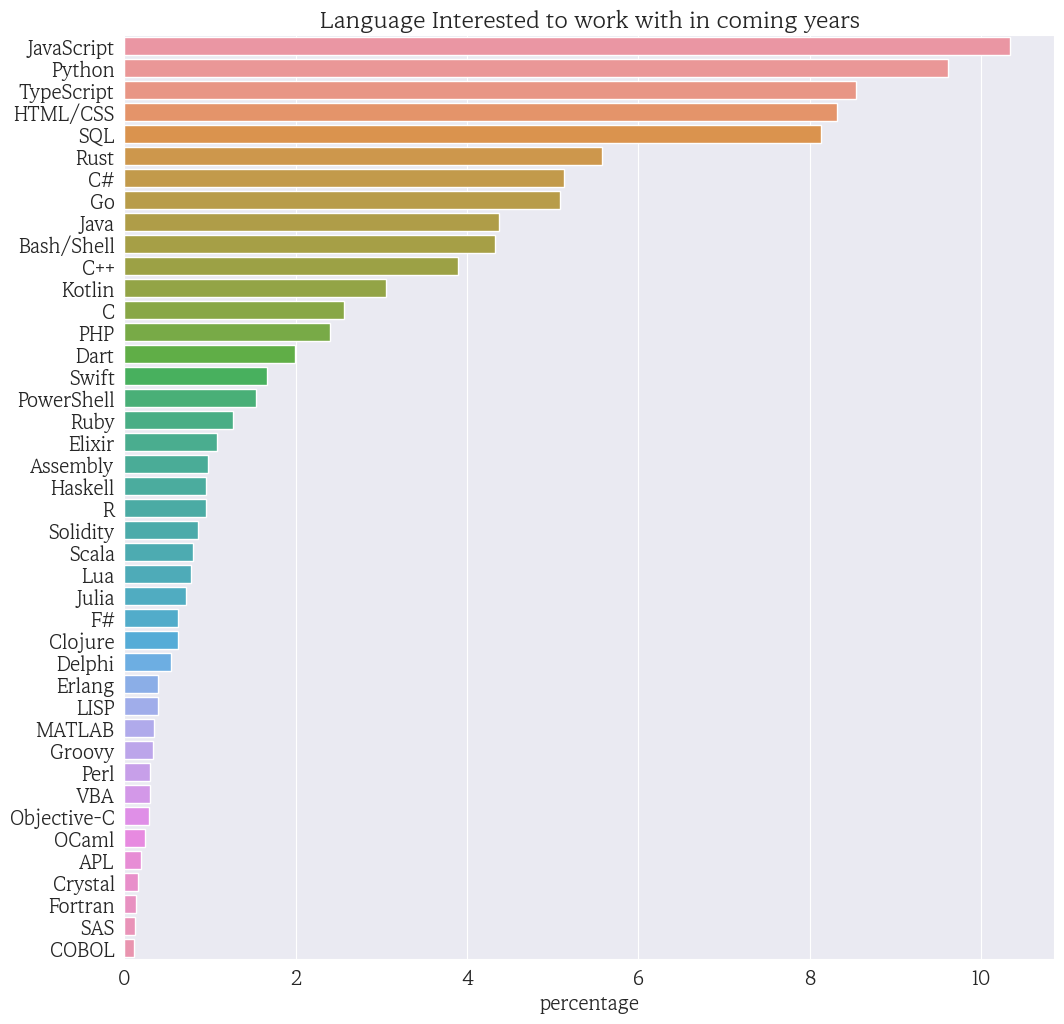

In [112]:
plt.figure(figsize=(12, 12))
sns.barplot(x = language_interested_in_df_percentage, y = language_interested_in_df_percentage.index)
plt.title("Language Interested to work with in coming years")
plt.xlabel("percentage")
plt.show()

## 문제19

In [113]:
# 2022년 데이터베이스에 가장 많이 사용되는 언어는 무엇입니까? 
# x축을 전체에서 차지하는 비율로 하는 그래프로 표현해보자.

survey_raw_df.DatabaseHaveWorkedWith

ResponseId
1                                                      NaN
2                                                      NaN
3                                     Microsoft SQL Server
4                                     Microsoft SQL Server
5        Cloud Firestore;Elasticsearch;Microsoft SQL Se...
                               ...                        
73264                 Elasticsearch;MySQL;PostgreSQL;Redis
73265                  Elasticsearch;MongoDB;Oracle;SQLite
73266    MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...
73267                  Microsoft SQL Server;MongoDB;Oracle
73268                     Microsoft SQL Server;Neo4j;Redis
Name: DatabaseHaveWorkedWith, Length: 73268, dtype: object

In [114]:
database_worked_with = split_multicolumn(survey_raw_df.DatabaseHaveWorkedWith)
database_worked_with

,Microsoft SQL Server,Cloud Firestore,Elasticsearch,Firebase Realtime Database,MongoDB,MySQL,Couchbase,CouchDB,PostgreSQL,Redis,DynamoDB,Neo4j,SQLite,Cassandra,MariaDB,Oracle,IBM DB2
ResponseId,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False,False,False
73265,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False
73266,True,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False


In [115]:
database_worked_with_totals = database_worked_with.sum().sort_values(ascending = False)
database_worked_with_totals

MySQL                         28520
PostgreSQL                    26538
SQLite                        19487
MongoDB                       17228
Microsoft SQL Server          16355
Redis                         13471
MariaDB                       10912
Elasticsearch                  7430
Oracle                         6994
Firebase Realtime Database     5309
DynamoDB                       5029
Cloud Firestore                4535
Cassandra                      1617
Neo4j                          1291
IBM DB2                        1219
Couchbase                       807
CouchDB                         783
dtype: int64

In [116]:
database_worked_with_percentage = database_worked_with_totals / database_worked_with_totals.sum() * 100
database_worked_with_percentage

MySQL                         17.024325
PostgreSQL                    15.841218
SQLite                        11.632294
MongoDB                       10.283838
Microsoft SQL Server           9.762722
Redis                          8.041188
MariaDB                        6.513655
Elasticsearch                  4.435159
Oracle                         4.174899
Firebase Realtime Database     3.169079
DynamoDB                       3.001940
Cloud Firestore                2.707059
Cassandra                      0.965229
Neo4j                          0.770631
IBM DB2                        0.727653
Couchbase                      0.481719
CouchDB                        0.467393
dtype: float64

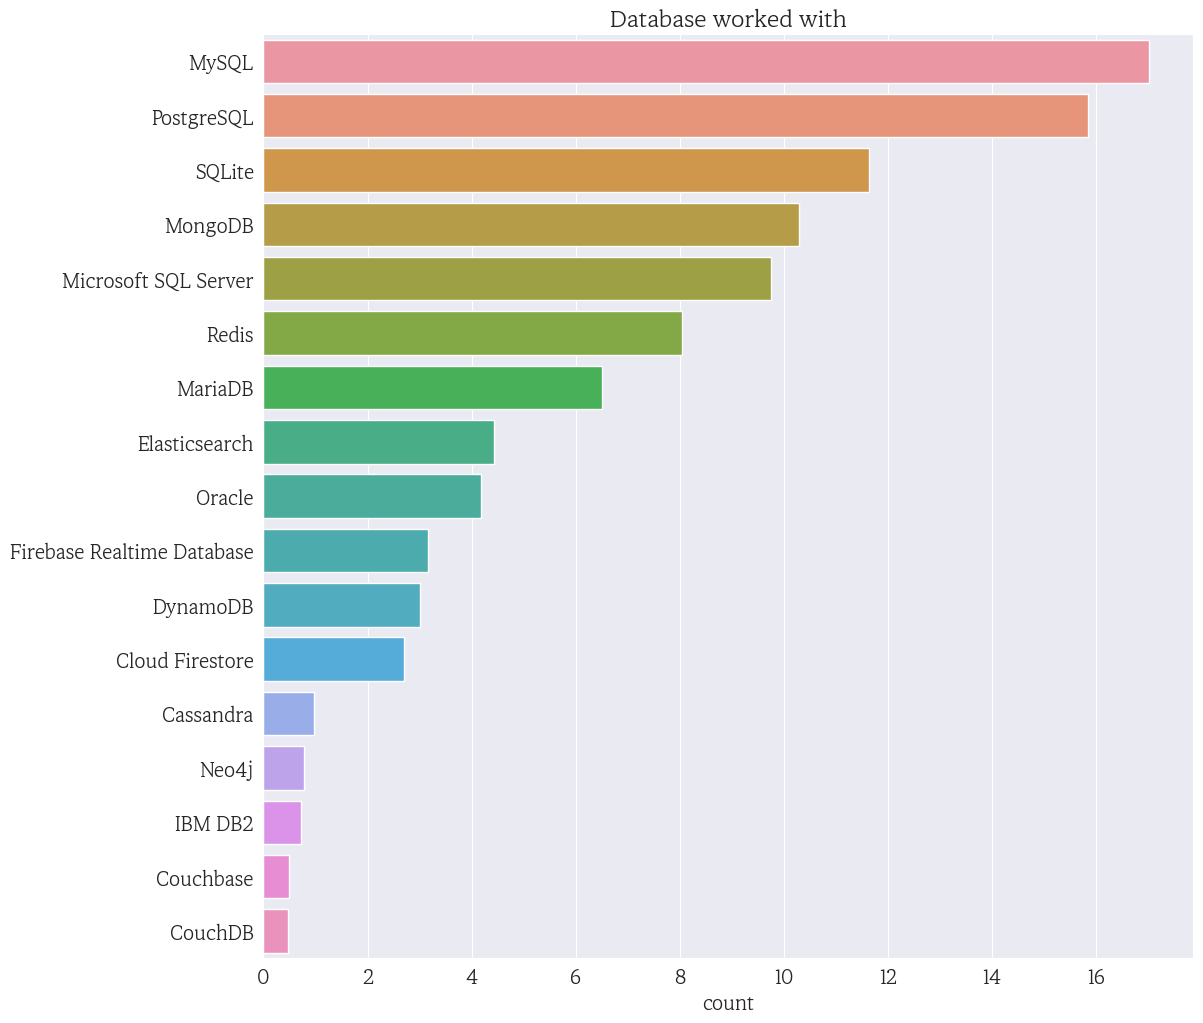

In [117]:
plt.figure(figsize=(12, 12))
sns.barplot(x = database_worked_with_percentage, y = database_worked_with_percentage.index)
plt.title("Database worked with")
plt.xlabel("count")
plt.show()